In [155]:
import pandas as pd 
from sklearn import *
import seaborn as sns
# Donwload Dataset via API unzipped
# api.dataset_download_files(dataset="prathamtripathi/drug-classification", unzip=True)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


In [157]:
df = pd.read_csv('RT_IOT2022', header = None)
df.to_csv('IOT.csv', index=False, header=False)

C:\Users\Michimon\AppData\Local\Temp\ipykernel_63620\66755027.py:1: DtypeWarning: Columns (1,2,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('RT_IOT2022', header = None)


# Data Cleaning

In [159]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,75,76,77,78,79,80,81,82,83,84
0,NaN,id.orig_p,id.resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type
1,0.0,38667,1883,tcp,mqtt,32.011598,9,5,3,3,...,0.0,29729182.958603,29729182.958603,29729182.958603,29729182.958603,0.0,64240,26847,502,MQTT_Publish
2,1.0,51143,1883,tcp,mqtt,31.883584000000006,9,5,3,3,...,0.0,29855277.061462,29855277.061462,29855277.061462,29855277.061462,0.0,64240,26847,502,MQTT_Publish
3,2.0,44761,1883,tcp,mqtt,32.124053,9,5,3,3,...,0.0,29842149.019241,29842149.019241,29842149.019241,29842149.019241,0.0,64240,26847,502,MQTT_Publish
4,3.0,60893,1883,tcp,mqtt,31.961063,9,5,3,3,...,0.0,29913774.967194,29913774.967194,29913774.967194,29913774.967194,0.0,64240,26847,502,MQTT_Publish


In [160]:
df = pd.read_csv('IOT.csv')
df.columns

Index(['Unnamed: 0', 'id.orig_p', 'id.resp_p', 'proto', 'service',
       'flow_duration', 'fwd_pkts_tot', 'bwd_pkts_tot', 'fwd_data_pkts_tot',
       'bwd_data_pkts_tot', 'fwd_pkts_per_sec', 'bwd_pkts_per_sec',
       'flow_pkts_per_sec', 'down_up_ratio', 'fwd_header_size_tot',
       'fwd_header_size_min', 'fwd_header_size_max', 'bwd_header_size_tot',
       'bwd_header_size_min', 'bwd_header_size_max', 'flow_FIN_flag_count',
       'flow_SYN_flag_count', 'flow_RST_flag_count', 'fwd_PSH_flag_count',
       'bwd_PSH_flag_count', 'flow_ACK_flag_count', 'fwd_URG_flag_count',
       'bwd_URG_flag_count', 'flow_CWR_flag_count', 'flow_ECE_flag_count',
       'fwd_pkts_payload.min', 'fwd_pkts_payload.max', 'fwd_pkts_payload.tot',
       'fwd_pkts_payload.avg', 'fwd_pkts_payload.std', 'bwd_pkts_payload.min',
       'bwd_pkts_payload.max', 'bwd_pkts_payload.tot', 'bwd_pkts_payload.avg',
       'bwd_pkts_payload.std', 'flow_pkts_payload.min',
       'flow_pkts_payload.max', 'flow_pkts_payload.

In [161]:
# Replace dots with underscores in column names
df.columns = df.columns.str.replace(r'\.', '_', regex=True)
df.head()

,Unnamed: 0,id_orig_p,id_resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,...,active_std,idle_min,idle_max,idle_tot,idle_avg,idle_std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type
0,0.0,38667,1883,tcp,mqtt,32.011598,9,5,3,3,...,0.0,2.972918e+07,2.972918e+07,2.972918e+07,2.972918e+07,0.0,64240,26847,502,MQTT_Publish
1,1.0,51143,1883,tcp,mqtt,31.883584,9,5,3,3,...,0.0,2.985528e+07,2.985528e+07,2.985528e+07,2.985528e+07,0.0,64240,26847,502,MQTT_Publish
2,2.0,44761,1883,tcp,mqtt,32.124053,9,5,3,3,...,0.0,2.984215e+07,2.984215e+07,2.984215e+07,2.984215e+07,0.0,64240,26847,502,MQTT_Publish
3,3.0,60893,1883,tcp,mqtt,31.961063,9,5,3,3,...,0.0,2.991377e+07,2.991377e+07,2.991377e+07,2.991377e+07,0.0,64240,26847,502,MQTT_Publish
4,4.0,51087,1883,tcp,mqtt,31.902362,9,5,3,3,...,0.0,2.981470e+07,2.981470e+07,2.981470e+07,2.981470e+07,0.0,64240,26847,502,MQTT_Publish


In [162]:
#df['id_orig_p'].duplicated().sum()
#df.drop(columns=['Unnamed: 0'], inplace=True)


In [163]:
#df['Attack_type'].unique()
df['Attack_type'].value_counts()
#Thing_Speak, MQTT_Publish, Wipro_bulb, 

Attack_type
DOS_SYN_Hping                 94659
Thing_Speak                    8108
ARP_poisioning                 7750
MQTT_Publish                   4146
NMAP_UDP_SCAN                  2590
NMAP_XMAS_TREE_SCAN            2010
NMAP_OS_DETECTION              2000
NMAP_TCP_scan                  1002
DDOS_Slowloris                  534
Wipro_bulb                      253
Metasploit_Brute_Force_SSH       37
NMAP_FIN_SCAN                    28
Name: count, dtype: int64

# Transform Attack Type Column

In [223]:
#Transform Attack_type column into binary classifying Attacks into Attack and Normal to Normal

# Define the mapping: the specified types will be mapped to 'Normal', everything else to 'Attack'
df['Attack_type'] = df['Attack_type'].apply(lambda x: 'Normal' if x in ['Thing_Speak', 'MQTT_Publish', 'Wipro_bulb'] else 'Attack')

Attack
Attack    123117
Name: count, dtype: int64

# Check Distribution on selected features

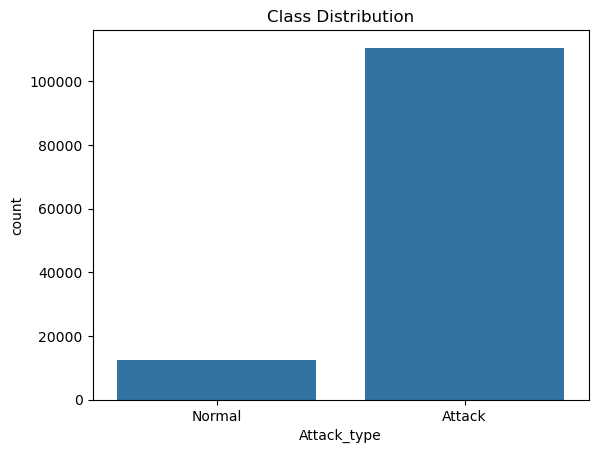

In [174]:
import matplotlib.pyplot as plt
import seaborn as sns

#Checking for Distribution in Attack_type Columns

sns.countplot(x='Attack_type', data=df)
plt.title("Class Distribution")
plt.show()

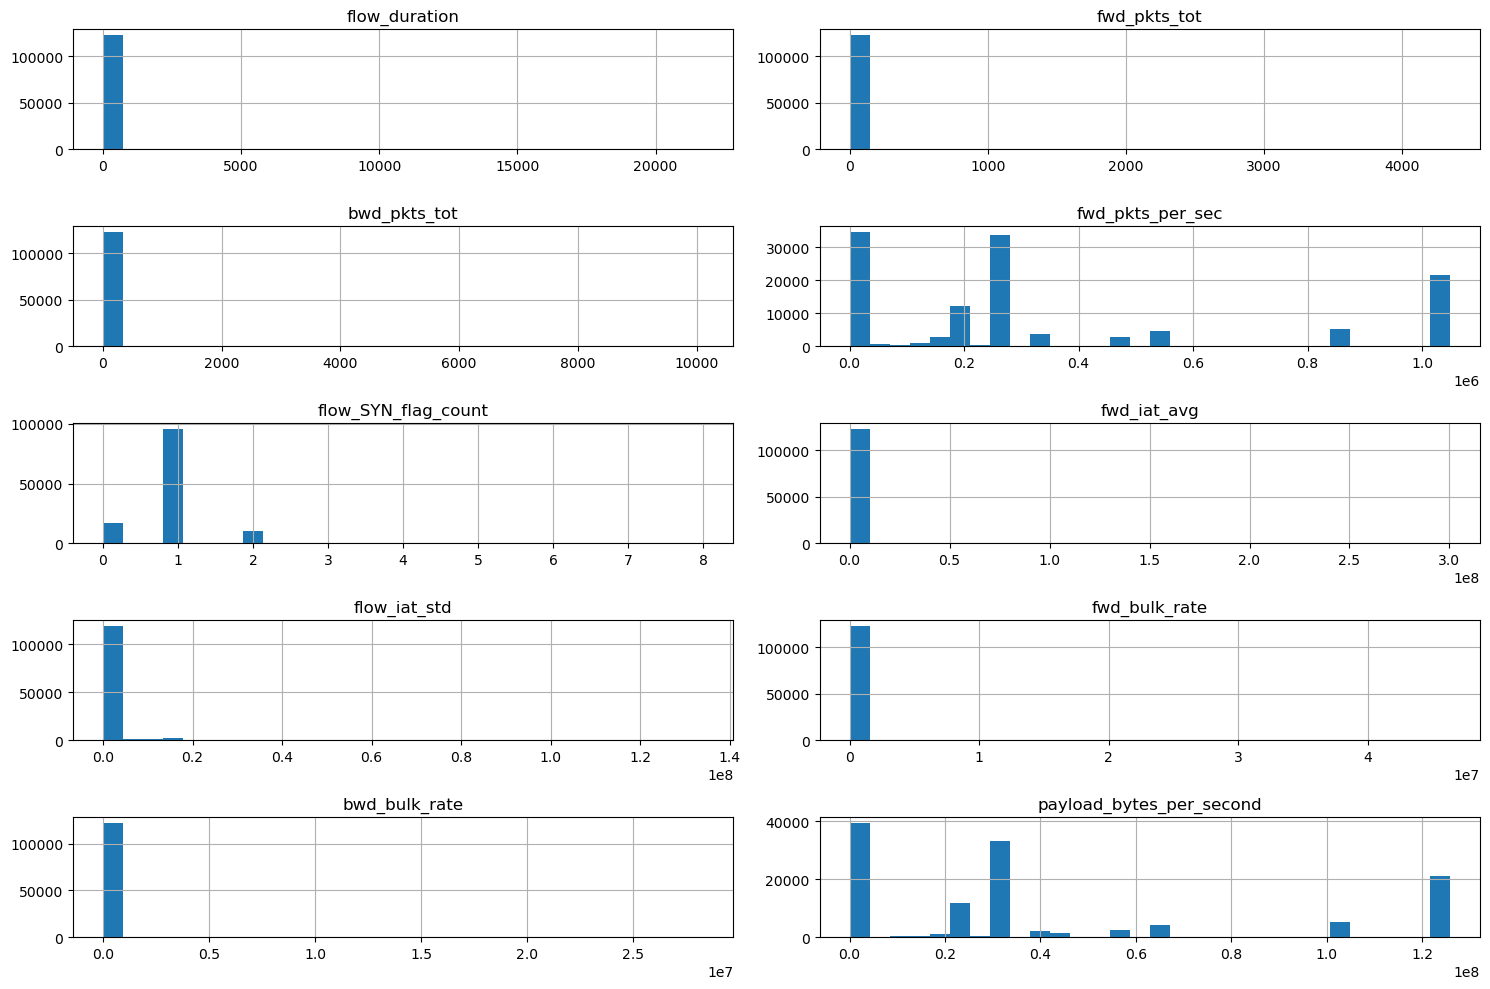

In [176]:
# List of 10 feature names (columns) from your DataFrame
features = ['flow_duration', 'fwd_pkts_tot', 'bwd_pkts_tot', 'fwd_pkts_per_sec', 'flow_SYN_flag_count',
            'fwd_iat_avg', 'flow_iat_std', 'fwd_bulk_rate', 'bwd_bulk_rate', 'payload_bytes_per_second'] 
            

# Plot histograms for the selected features
df[features].hist(bins=30, figsize=(15, 10), layout=(5, 2))  # Adjust layout based on preference
plt.tight_layout()  # Ensure that subplots don't overlap
plt.show()



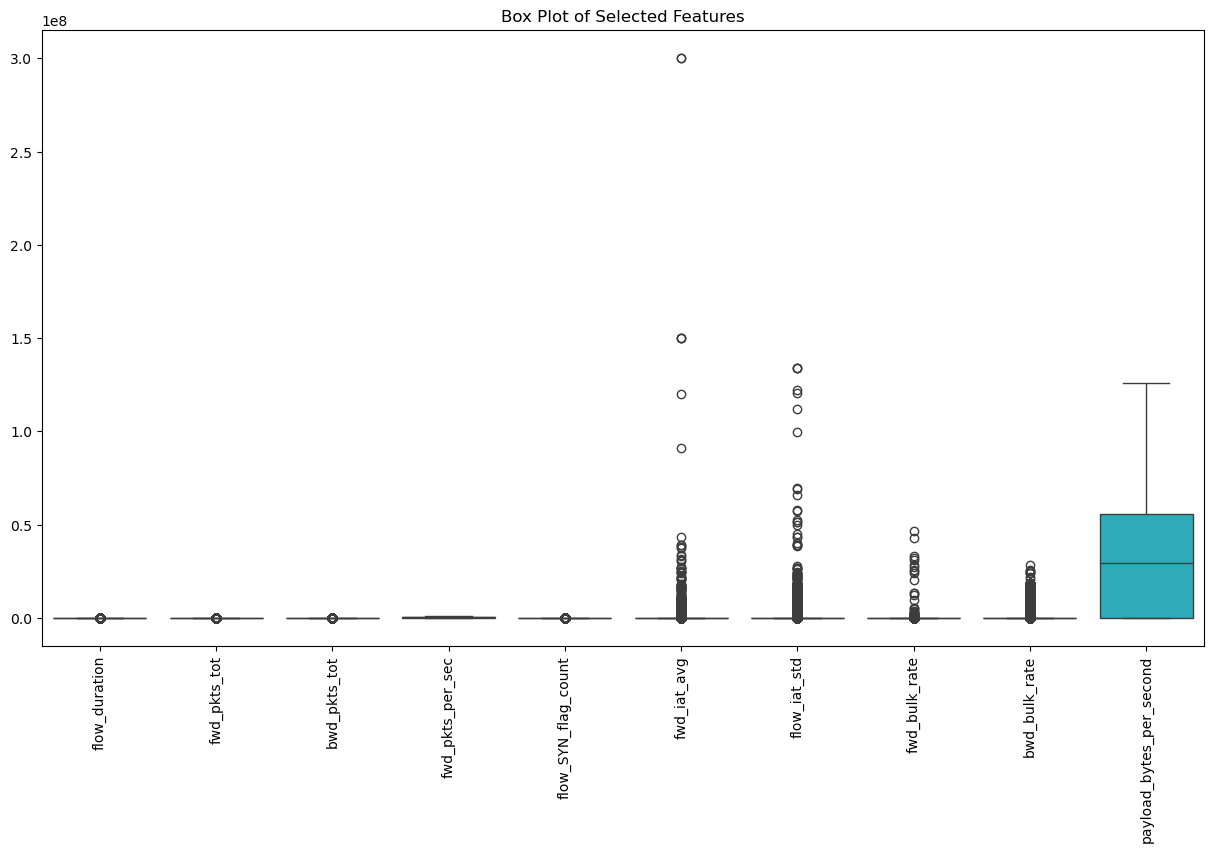

In [177]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df[features])
plt.xticks(rotation=90)  # Rotate feature names if necessary
plt.title('Box Plot of Selected Features')
plt.show()

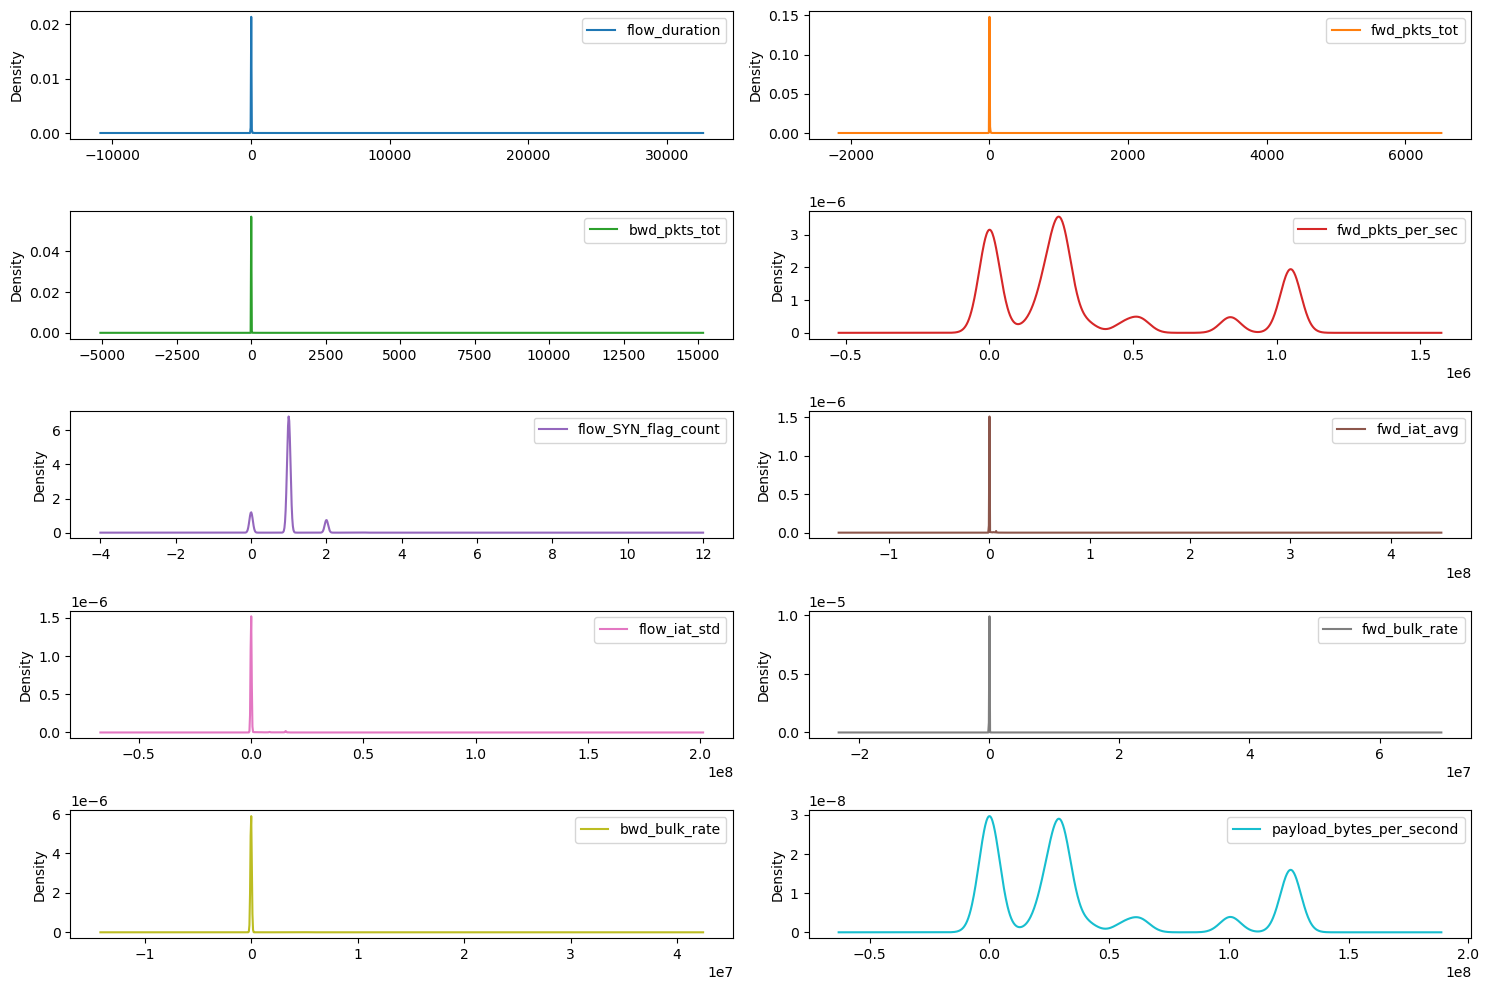

In [39]:
# Plot density (KDE) plots for the selected 10 features
df[features].plot(kind='density', subplots=True, layout=(5, 2), sharex=False, figsize=(15, 10))  # Adjust layout based on preference
plt.tight_layout()  # Ensure that subplots don't overlap
plt.show()

# Feature Selection

In [180]:
# Converting object columns to dummy variables
iot_df = pd.get_dummies(df)

corr_df = iot_df.corr()

corr_df.head()

,Unnamed: 0,id_orig_p,id_resp_p,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,...,service_dns,service_http,service_irc,service_mqtt,service_ntp,service_radius,service_ssh,service_ssl,Attack_type_Attack,Attack_type_Normal
Unnamed: 0,1.000000,0.016951,-0.219485,-0.033754,-0.064143,-0.035444,-0.027248,-0.028472,0.304019,0.304133,...,-0.317862,-0.189401,-0.022699,-0.213911,-0.034093,-0.004607,-0.018329,-0.161540,0.372239,-0.372239
id_orig_p,0.016951,1.000000,0.168818,0.019978,0.040027,0.021090,0.017724,0.017749,-0.095665,-0.095754,...,0.179950,0.073654,0.014984,0.123795,0.020957,0.006243,0.004196,0.123736,-0.203085,0.203085
id_resp_p,-0.219485,0.168818,1.000000,0.012719,0.005481,-0.004072,0.001625,-0.001290,-0.135708,-0.135704,...,0.012223,-0.030243,0.020105,0.030798,-0.005319,0.000612,-0.002847,-0.014745,0.000028,-0.000028
flow_duration,-0.033754,0.019978,0.012719,1.000000,0.741707,0.071395,0.754355,0.058859,-0.027805,-0.027799,...,-0.007644,0.002857,0.009134,0.056914,-0.000695,-0.000118,-0.000210,0.059003,-0.059628,0.059628
fwd_pkts_tot,-0.064143,0.040027,0.005481,0.741707,1.000000,0.407452,0.914683,0.379742,-0.053855,-0.053875,...,-0.001982,0.043200,0.027196,0.062383,-0.001666,-0.000229,0.008741,0.135009,-0.093758,0.093758


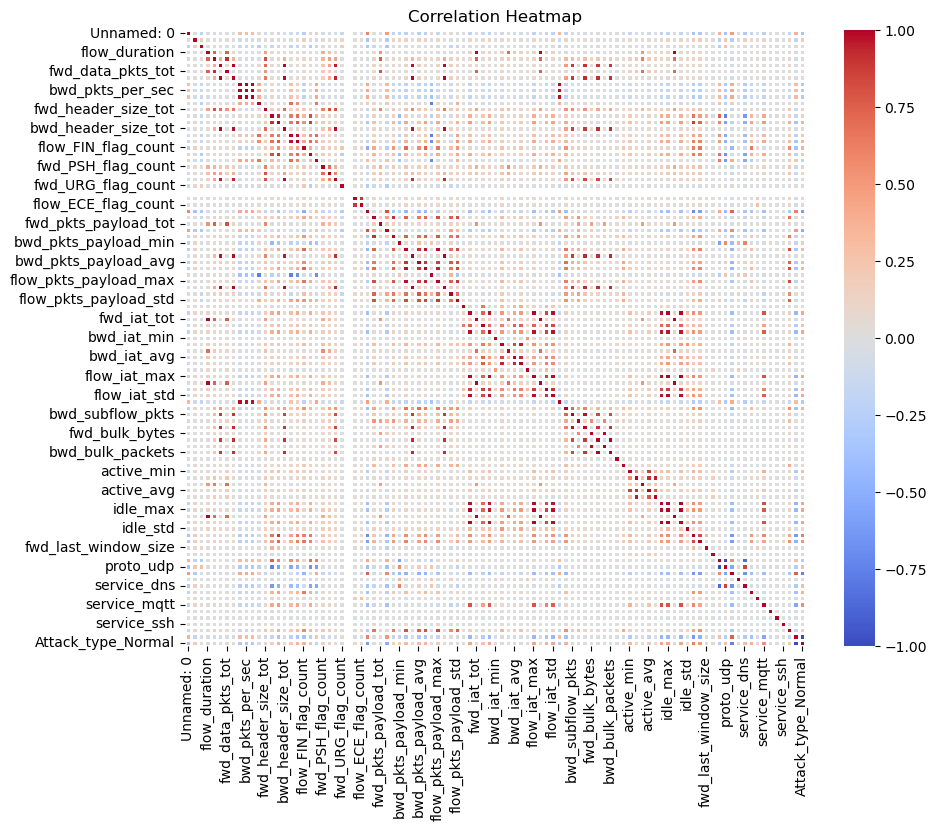

In [182]:
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_df, annot=False, cmap='coolwarm', vmin=-1, vmax=1, linewidths=1)
plt.title('Correlation Heatmap')
plt.show()

In [184]:
import pandas as pd
import numpy as np

# Calculate correlation matrix
corr_matrix = iot_df.corr().abs()

# Select upper triangle of correlation matrix
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find index of features with correlation greater than 0.9
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.9)]

# Drop features
iot_df = iot_df.drop(columns=to_drop)


In [192]:
to_drop

['fwd_data_pkts_tot',
 'bwd_data_pkts_tot',
 'bwd_pkts_per_sec',
 'flow_pkts_per_sec',
 'fwd_header_size_max',
 'bwd_header_size_tot',
 'bwd_header_size_max',
 'flow_ACK_flag_count',
 'fwd_pkts_payload_std',
 'bwd_pkts_payload_tot',
 'bwd_pkts_payload_std',
 'flow_pkts_payload_max',
 'flow_pkts_payload_tot',
 'fwd_iat_tot',
 'fwd_iat_std',
 'bwd_iat_std',
 'flow_iat_max',
 'flow_iat_tot',
 'flow_iat_std',
 'payload_bytes_per_second',
 'bwd_subflow_bytes',
 'bwd_bulk_bytes',
 'fwd_bulk_packets',
 'bwd_bulk_packets',
 'active_avg',
 'active_std',
 'idle_min',
 'idle_max',
 'idle_tot',
 'idle_avg',
 'proto_udp',
 'Attack_type_Normal']

In [186]:
ml_df = iot_df#.drop(columns=features_to_drop)
#ml_df = iot_df.drop(columns=low_corr_features)
#ml_df = iot_df

In [188]:
corr = ml_df.corr()

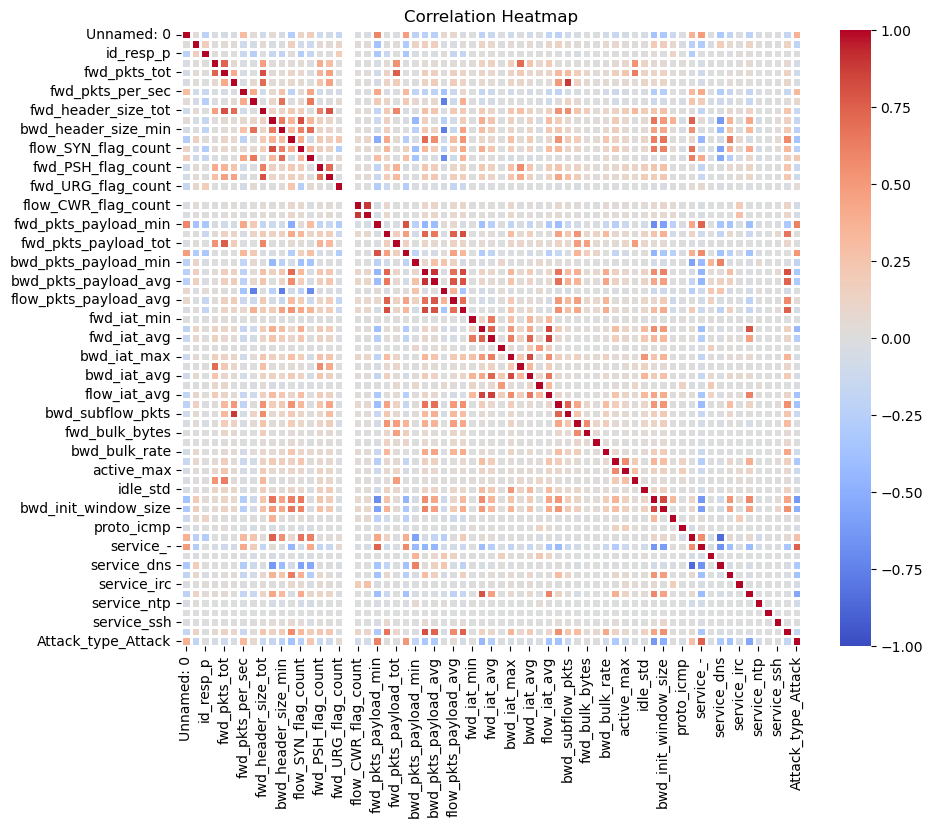

In [190]:
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=False, cmap='coolwarm', vmin=-1, vmax=1, linewidths=1)
plt.title('Correlation Heatmap')
plt.show()

In [194]:
ml_df.to_csv('preprocessed_iot.csv')

In [195]:
ml_df.head()

,Unnamed: 0,id_orig_p,id_resp_p,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_pkts_per_sec,down_up_ratio,fwd_header_size_tot,fwd_header_size_min,...,service_dhcp,service_dns,service_http,service_irc,service_mqtt,service_ntp,service_radius,service_ssh,service_ssl,Attack_type_Attack
0,0.0,38667,1883,32.011598,9,5,0.281148,0.555556,296,32,...,False,False,False,False,True,False,False,False,False,False
1,1.0,51143,1883,31.883584,9,5,0.282277,0.555556,296,32,...,False,False,False,False,True,False,False,False,False,False
2,2.0,44761,1883,32.124053,9,5,0.280164,0.555556,296,32,...,False,False,False,False,True,False,False,False,False,False
3,3.0,60893,1883,31.961063,9,5,0.281593,0.555556,296,32,...,False,False,False,False,True,False,False,False,False,False
4,4.0,51087,1883,31.902362,9,5,0.282111,0.555556,296,32,...,False,False,False,False,True,False,False,False,False,False
